1. We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.<br>
Task:<br>
1.fitting it to the periodic function <br>
2.plot the fit <br>
Data : <br>
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 <br>
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


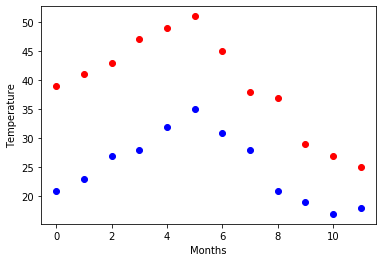

In [3]:
import numpy as np
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)

plt.plot(months, max_temp, 'ro')
plt.plot(months, min_temp, 'bo')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.show()

In [26]:
from scipy import optimize

def func(time, avg, ampl, time_offset):
    return (avg + ampl * np.cos((time + time_offset) * 2 * np.pi/time.max()))

res_max, cov_max =optimize.curve_fit(func, months, max_temp )
res_min, cov_min = optimize.curve_fit(func, months, min_temp)

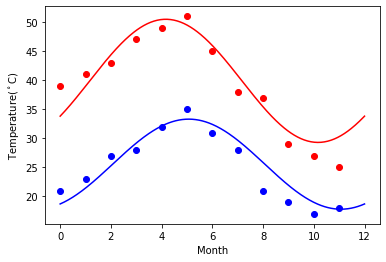

In [27]:
days = np.linspace(0, 12, num = 365)
plt.figure()
plt.plot(months, max_temp, 'ro')
plt.plot(days, func(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, func(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature($^\circ$C)')
plt.show()


2. This assignment is for visualization using matplotlib:<br>
data to use:<br>
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv <br>
titanic = pd.read_csv(url) <br>
Charts to plot: <br>
    1. Create a pie chart presenting the male/female proportion. <br>
    2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender. 

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url) 
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
titanic['sex'] = titanic['sex'].astype('str')

In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5, 1.0, 'Male/Female proportion')

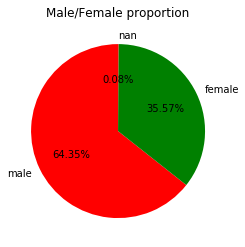

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Create a pie chart presenting the male/female proportion
count = titanic['sex'].value_counts()
colors = ['red', 'green']
plt.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90, autopct='%.2f%%')
plt.title('Male/Female proportion')

In [6]:
count

male      843
female    466
nan         1
Name: sex, dtype: int64

B. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['sex']= le.fit_transform(titanic.sex)

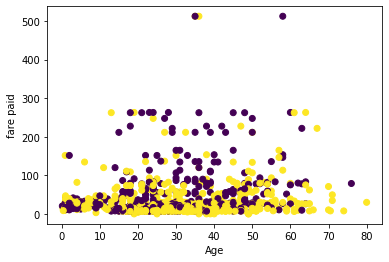

In [21]:
plt.scatter(titanic.age, titanic.fare, c = titanic.sex)
plt.xlabel('Age')
plt.ylabel('fare paid')
plt.show()
